Defining the default font sizes to make the figures prettier

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Directory - to save the images in high-resolution

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "deep"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Vanishing / Exploding Gradients Problem

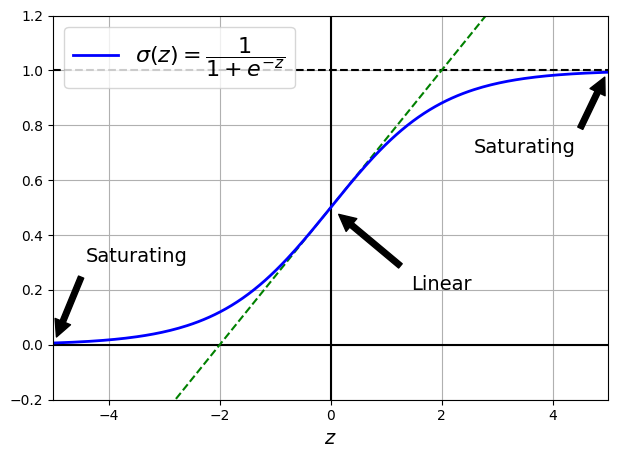

In [3]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, sigmoid(z), "b-", linewidth=2,
         label=r"$\sigma(z) = \dfrac{1}{1+e^{-z}}$")
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props,
             fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props,
             fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props,
             fontsize=14, ha="center")
plt.grid(True)
plt.axis([-5, 5, -0.2, 1.2])
plt.xlabel("$z$")
plt.legend(loc="upper left", fontsize=16)

save_fig("sigmoid_saturation_plot")
plt.show()

### Xavier and He Initialization

In [4]:
import tensorflow as tf

dense = tf.keras.layers.Dense(50, activation="relu",
                              kernel_initializer="he_normal")

In [5]:
he_avg_init = tf.keras.initializers.VarianceScaling(scale=2., mode="fan_avg",
                                                    distribution="uniform")

dense = tf.keras.layers.Dense(50, activation="sigmoid",
                              kernel_initializer=he_avg_init)

### Non-saturating Activation Functions

**Leaky ReLU**

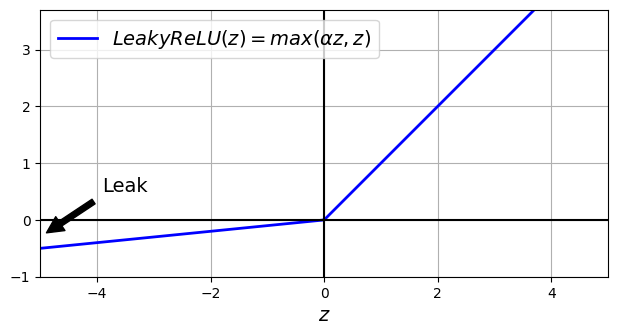

In [6]:
def leaky_relu(z, alpha):
    return np.maximum(alpha * z, z)

z = np.linspace(-5, 5, 200)
plt.plot(z, leaky_relu(z, 0.1), "b-", linewidth=2, label=r"$LeakyReLU(z) = max(\alpha z, z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-1, 3.7], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.3), arrowprops=props,
             fontsize=14, ha="center")
plt.xlabel("$z$")
plt.axis([-5, 5, -1, 3.7])
plt.gca().set_aspect("equal")
plt.legend()

save_fig("leaky_relu_plot")
plt.show()

In [7]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)
dense = tf.keras.layers.Dense(50, activation=leaky_relu,
                              kernel_initializer="he_normal")

In [8]:
model = tf.keras.models.Sequential([
    ## more layers
    tf.keras.layers.Dense(50, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(alpha=0.2)
    ## more layers
])

**ELU**

In [9]:
dense = tf.keras.layers.Dense(50, activation="elu",
                              kernel_initializer="he_normal")

**SELU**

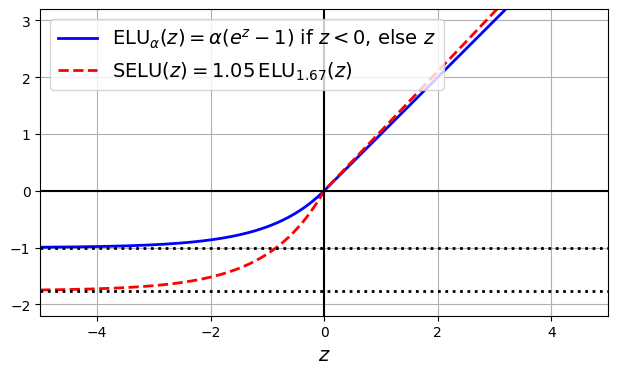

In [10]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1 / np.sqrt(2)) * np.exp(1 / 2) - 1)
scale_0_1 = (
    (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e))
    * np.sqrt(2 * np.pi)
    * (
        2 * erfc(np.sqrt(2)) * np.e ** 2
        + np.pi * erfc(1 / np.sqrt(2)) ** 2 * np.e
        - 2 * (2 + np.pi) * erfc(1 / np.sqrt(2)) * np.sqrt(np.e)
        + np.pi
        + 2
    ) ** (-1 / 2)
)

def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

z = np.linspace(-5, 5, 200)
plt.plot(z, elu(z), "b-", linewidth=2, label=r"ELU$_\alpha(z) = \alpha (e^z - 1)$ if $z < 0$, else $z$")
plt.plot(z, selu(z), "r--", linewidth=2, label=r"SELU$(z) = 1.05 \, $ELU$_{1.67}(z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k:', linewidth=2)
plt.plot([-5, 5], [-1.758, -1.758], 'k:', linewidth=2)
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-5, 5, -2.2, 3.2])
plt.xlabel("$z$")
plt.gca().set_aspect("equal")
plt.legend()

save_fig("elu_selu_plot")
plt.show()

In [11]:
dense = tf.keras.layers.Dense(50, activation="selu",
                              kernel_initializer="lecun_normal")

In [12]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="selu",
                                    kernel_initializer="lecun_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [14]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

4422102/4422102 [==============================] - 0s 0us/step


In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [16]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)

X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [17]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 65s 27ms/step - loss: 1.1140 - accuracy: 0.5819 - val_loss: 0.7479 - val_accuracy: 0.7264
Epoch 2/5
1719/1719 [==============================] - 47s 27ms/step - loss: 0.6763 - accuracy: 0.7549 - val_loss: 0.6102 - val_accuracy: 0.7880
Epoch 3/5
1719/1719 [==============================] - 44s 26ms/step - loss: 0.5807 - accuracy: 0.7925 - val_loss: 0.5357 - val_accuracy: 0.8042
Epoch 4/5
1719/1719 [==============================] - 45s 26ms/step - loss: 0.5389 - accuracy: 0.8100 - val_loss: 0.5597 - val_accuracy: 0.8108
Epoch 5/5
1719/1719 [==============================] - 43s 25ms/step - loss: 0.5485 - accuracy: 0.8095 - val_loss: 0.6201 - val_accuracy: 0.7828


The network managed to learn, despite how deep it is. Now what happens if we try to use the ReLU activation function instead:

In [18]:
tf.random.set_seed(42)

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

for layer in range(100):
  model.add(tf.keras.layers.Dense(100, activation="relu",
                                  kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [21]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 59s 26ms/step - loss: 1.8044 - accuracy: 0.2660 - val_loss: 1.1840 - val_accuracy: 0.4928
Epoch 2/5
1719/1719 [==============================] - 55s 32ms/step - loss: 1.2828 - accuracy: 0.4546 - val_loss: 1.0855 - val_accuracy: 0.5624
Epoch 3/5
1719/1719 [==============================] - 45s 26ms/step - loss: 1.0032 - accuracy: 0.5670 - val_loss: 1.0451 - val_accuracy: 0.5302
Epoch 4/5
1719/1719 [==============================] - 46s 27ms/step - loss: 0.8756 - accuracy: 0.6341 - val_loss: 0.8204 - val_accuracy: 0.6758
Epoch 5/5
1719/1719 [==============================] - 46s 27ms/step - loss: 0.8642 - accuracy: 0.6487 - val_loss: 0.9580 - val_accuracy: 0.5966


Not great at all, we suffered from the vanishing/exploding gradients problem.

### Batch Normalization

In [22]:
# clear the name counters and set the random seed
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)               4

In [25]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [26]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics="accuracy")
history = model.fit(X_train_scaled, y_train, epochs=2,
                    validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 [==============================] - 12s 6ms/step - loss: 0.5530 - accuracy: 0.8079 - val_loss: 2.1086 - val_accuracy: 0.2792
Epoch 2/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4110 - accuracy: 0.8535 - val_loss: 2.1116 - val_accuracy: 0.3430


In [27]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal",
                          use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal",
                          use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [29]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics="accuracy")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5730 - accuracy: 0.8031 - val_loss: 1.9099 - val_accuracy: 0.3846
Epoch 2/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4126 - accuracy: 0.8547 - val_loss: 2.0103 - val_accuracy: 0.3822


### Gradient Clipping

In [30]:
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)

In [31]:
optimizer = tf.keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)

### Reusing Pretrained Layers

**Reusing a Keras model**

In [32]:
# split Fashion MNIST into tasks A and B, then train and save
# model A to "my_model_A".

pos_class_id = class_names.index("Pullover")
neg_class_id = class_names.index("T-shirt/top")

def split_dataset(X, y):
    y_for_B = (y == pos_class_id) | (y == neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
    old_class_ids = list(set(range(10)) - set([neg_class_id, pos_class_id]))
    for old_class_id, new_class_id in zip(old_class_ids, range(8)):
        y_A[y_A == old_class_id] = new_class_id  # reorder class ids for A
    return ((X[~y_for_B], y_A), (X[y_for_B], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(8, activation="softmax")
])

model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["accuracy"])
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                      validation_data=(X_valid_A, y_valid_A))
model_A.save("my_model_A")

Epoch 1/20
1376/1376 [==============================] - 6s 4ms/step - loss: 1.2385 - accuracy: 0.6284 - val_loss: 0.7203 - val_accuracy: 0.7744
Epoch 2/20
1376/1376 [==============================] - 5s 4ms/step - loss: 0.6073 - accuracy: 0.8045 - val_loss: 0.5167 - val_accuracy: 0.8268
Epoch 3/20
1376/1376 [==============================] - 5s 3ms/step - loss: 0.4842 - accuracy: 0.8439 - val_loss: 0.4428 - val_accuracy: 0.8473
Epoch 4/20
1376/1376 [==============================] - 6s 4ms/step - loss: 0.4257 - accuracy: 0.8604 - val_loss: 0.3984 - val_accuracy: 0.8631
Epoch 5/20
1376/1376 [==============================] - 5s 3ms/step - loss: 0.3886 - accuracy: 0.8717 - val_loss: 0.3704 - val_accuracy: 0.8721
Epoch 6/20
1376/1376 [==============================] - 5s 4ms/step - loss: 0.3626 - accuracy: 0.8786 - val_loss: 0.3503 - val_accuracy: 0.8787
Epoch 7/20
1376/1376 [==============================] - 5s 4ms/step - loss: 0.3438 - accuracy: 0.8838 - val_loss: 0.3346 - val_accuracy:

In [33]:
# train and evaluate model B, without reusing model A

tf.random.set_seed(42)
model_B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_B.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["accuracy"])
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))
model_B.evaluate(X_test_B, y_test_B)

Epoch 1/20
7/7 [==============================] - 1s 55ms/step - loss: 0.6893 - accuracy: 0.5300 - val_loss: 0.6708 - val_accuracy: 0.6093
Epoch 2/20
7/7 [==============================] - 0s 30ms/step - loss: 0.6635 - accuracy: 0.6200 - val_loss: 0.6484 - val_accuracy: 0.6914
Epoch 3/20
7/7 [==============================] - 0s 17ms/step - loss: 0.6380 - accuracy: 0.7350 - val_loss: 0.6260 - val_accuracy: 0.7369
Epoch 4/20
7/7 [==============================] - 0s 30ms/step - loss: 0.6107 - accuracy: 0.7800 - val_loss: 0.6057 - val_accuracy: 0.7646
Epoch 5/20
7/7 [==============================] - 0s 17ms/step - loss: 0.5884 - accuracy: 0.8300 - val_loss: 0.5850 - val_accuracy: 0.7992
Epoch 6/20
7/7 [==============================] - 0s 17ms/step - loss: 0.5654 - accuracy: 0.8750 - val_loss: 0.5659 - val_accuracy: 0.8190
Epoch 7/20
7/7 [==============================] - 0s 18ms/step - loss: 0.5442 - accuracy: 0.8900 - val_loss: 0.5471 - val_accuracy: 0.8447
Epoch 8/20
7/7 [===========

[0.39681899547576904, 0.921999990940094]

In [34]:
model_A = tf.keras.models.load_model("my_model_A")
model_B_on_A = tf.keras.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [35]:
tf.random.set_seed(42)

In [36]:
model_A_clone = tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [37]:
# creating model_B_on_A just like in the previous cell
model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [38]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = False

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer,
                     metrics=["accuracy"])

In [39]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
  layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer,
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 78ms/step - loss: 0.8043 - accuracy: 0.5800 - val_loss: 0.5966 - val_accuracy: 0.6479
Epoch 2/4
7/7 [==============================] - 0s 27ms/step - loss: 0.5530 - accuracy: 0.6900 - val_loss: 0.5033 - val_accuracy: 0.7794
Epoch 3/4
7/7 [==============================] - 0s 18ms/step - loss: 0.5105 - accuracy: 0.7800 - val_loss: 0.4886 - val_accuracy: 0.8032
Epoch 4/4
7/7 [==============================] - 0s 30ms/step - loss: 0.4983 - accuracy: 0.7950 - val_loss: 0.4793 - val_accuracy: 0.8101
Epoch 1/16
7/7 [==============================] - 1s 43ms/step - loss: 0.4777 - accuracy: 0.8100 - val_loss: 0.4352 - val_accuracy: 0.8586
Epoch 2/16
7/7 [==============================] - 0s 18ms/step - loss: 0.4418 - accuracy: 0.8250 - val_loss: 0.4056 - val_accuracy: 0.8764
Epoch 3/16
7/7 [==============================] - 0s 16ms/step - loss: 0.4091 - accuracy: 0.8400 - val_loss: 0.3884 - val_accuracy: 0.8813
Epoch 4/16
7/7 [===============

In [40]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.2568 - accuracy: 0.9365


[0.25676900148391724, 0.9365000128746033]

In [41]:
1 - (100 - 93.85) / (100 - 91.85)

0.24539877300613477

### Faster Optimizers

In [42]:
# train and evaluate model B, without reusing model A

def build_model(seed=42):
  tf.random.set_seed(seed)
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=[28, 28]),
      tf.keras.layers.Dense(100, activation="relu",
                            kernel_initializer="he_normal"),
      tf.keras.layers.Dense(100, activation="relu",
                            kernel_initializer="he_normal"),
      tf.keras.layers.Dense(100, activation="relu",
                            kernel_initializer="he_normal"),
      tf.keras.layers.Dense(10, activation="softmax")
  ])
  return model

def build_and_train_model(optimizer):
  model = build_model()
  model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                metrics=["accuracy"])
  return model.fit(X_train, y_train, epochs=10,
                   validation_data=(X_valid, y_valid))

In [43]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [44]:
history_sgd = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6945 - accuracy: 0.7651 - val_loss: 0.5132 - val_accuracy: 0.8160
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4689 - accuracy: 0.8348 - val_loss: 0.4459 - val_accuracy: 0.8434
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4218 - accuracy: 0.8511 - val_loss: 0.3985 - val_accuracy: 0.8552
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3936 - accuracy: 0.8623 - val_loss: 0.3807 - val_accuracy: 0.8626
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3710 - accuracy: 0.8678 - val_loss: 0.3669 - val_accuracy: 0.8690
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3574 - accuracy: 0.8726 - val_loss: 0.3723 - val_accuracy: 0.8618
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3404 - accuracy: 0.8771 - val_loss: 0.3635 - val_accuracy:

### Momentum optimization

In [45]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [46]:
history_momentum = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7031 - accuracy: 0.7568 - val_loss: 0.5107 - val_accuracy: 0.8156
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4734 - accuracy: 0.8335 - val_loss: 0.4462 - val_accuracy: 0.8346
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4268 - accuracy: 0.8497 - val_loss: 0.4069 - val_accuracy: 0.8546
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3975 - accuracy: 0.8611 - val_loss: 0.3774 - val_accuracy: 0.8620
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3753 - accuracy: 0.8660 - val_loss: 0.3641 - val_accuracy: 0.8670
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3606 - accuracy: 0.8706 - val_loss: 0.3687 - val_accuracy: 0.8636
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3440 - accuracy: 0.8750 - val_loss: 0.3616 - val_accuracy:

### Nesterov Accelerated Gradient

In [47]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,
                                    nesterov=True)

In [48]:
history_nesterov = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7013 - accuracy: 0.7576 - val_loss: 0.4945 - val_accuracy: 0.8246
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4688 - accuracy: 0.8358 - val_loss: 0.4443 - val_accuracy: 0.8374
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4255 - accuracy: 0.8494 - val_loss: 0.4104 - val_accuracy: 0.8546
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3994 - accuracy: 0.8584 - val_loss: 0.3838 - val_accuracy: 0.8654
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3773 - accuracy: 0.8662 - val_loss: 0.3710 - val_accuracy: 0.8666
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3633 - accuracy: 0.8709 - val_loss: 0.3808 - val_accuracy: 0.8630
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3473 - accuracy: 0.8754 - val_loss: 0.3811 - val_accuracy

### AdaGrad

In [49]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)

In [50]:
history_adagrad = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.9644 - accuracy: 0.6909 - val_loss: 0.6668 - val_accuracy: 0.7786
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6258 - accuracy: 0.7943 - val_loss: 0.5729 - val_accuracy: 0.8084
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5610 - accuracy: 0.8130 - val_loss: 0.5307 - val_accuracy: 0.8232
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5267 - accuracy: 0.8245 - val_loss: 0.5067 - val_accuracy: 0.8286
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5039 - accuracy: 0.8311 - val_loss: 0.4897 - val_accuracy: 0.8326
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4878 - accuracy: 0.8352 - val_loss: 0.4779 - val_accuracy: 0.8332
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4755 - accuracy: 0.8383 - val_loss: 0.4677 - val_accuracy:

### RMSProp

In [51]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [52]:
history_rmsprop = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5201 - accuracy: 0.8118 - val_loss: 0.4387 - val_accuracy: 0.8372
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3928 - accuracy: 0.8583 - val_loss: 0.4746 - val_accuracy: 0.8274
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3677 - accuracy: 0.8672 - val_loss: 0.3937 - val_accuracy: 0.8664
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3607 - accuracy: 0.8739 - val_loss: 0.3956 - val_accuracy: 0.8704
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3546 - accuracy: 0.8762 - val_loss: 0.4226 - val_accuracy: 0.8510
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3485 - accuracy: 0.8789 - val_loss: 0.4284 - val_accuracy: 0.8680
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3491 - accuracy: 0.8796 - val_loss: 0.4296 - val_accuracy:

### Adam Optimization

In [53]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                     beta_2=0.999)

In [54]:
history_adam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4999 - accuracy: 0.8216 - val_loss: 0.4415 - val_accuracy: 0.8404
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3773 - accuracy: 0.8617 - val_loss: 0.3933 - val_accuracy: 0.8494
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3444 - accuracy: 0.8731 - val_loss: 0.3411 - val_accuracy: 0.8714
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3195 - accuracy: 0.8822 - val_loss: 0.3425 - val_accuracy: 0.8780
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3020 - accuracy: 0.8883 - val_loss: 0.3374 - val_accuracy: 0.8760
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2869 - accuracy: 0.8938 - val_loss: 0.3430 - val_accuracy: 0.8754
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2733 - accuracy: 0.8981 - val_loss: 0.3504 - val_accuracy:

**Adamax Optimization**

In [55]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9,
                                       beta_2=0.999)

In [56]:
history_adamax = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5417 - accuracy: 0.8134 - val_loss: 0.4628 - val_accuracy: 0.8288
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3964 - accuracy: 0.8597 - val_loss: 0.3925 - val_accuracy: 0.8508
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3601 - accuracy: 0.8697 - val_loss: 0.3712 - val_accuracy: 0.8690
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3339 - accuracy: 0.8801 - val_loss: 0.3384 - val_accuracy: 0.8744
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3125 - accuracy: 0.8861 - val_loss: 0.3274 - val_accuracy: 0.8746
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2994 - accuracy: 0.8911 - val_loss: 0.3384 - val_accuracy: 0.8748
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2848 - accuracy: 0.8953 - val_loss: 0.3303 - val_accuracy:

**Nadam Optimization**

In [57]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9,
                                       beta_2=0.999)

In [58]:
history_nadam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 10s 4ms/step - loss: 0.4836 - accuracy: 0.8287 - val_loss: 0.4162 - val_accuracy: 0.8434
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3649 - accuracy: 0.8681 - val_loss: 0.3856 - val_accuracy: 0.8554
Epoch 3/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3309 - accuracy: 0.8782 - val_loss: 0.3502 - val_accuracy: 0.8752
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3102 - accuracy: 0.8856 - val_loss: 0.3306 - val_accuracy: 0.8754
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2901 - accuracy: 0.8923 - val_loss: 0.3427 - val_accuracy: 0.8728
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2773 - accuracy: 0.8957 - val_loss: 0.3586 - val_accuracy: 0.8760
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2675 - accuracy: 0.8992 - val_loss: 0.3617 - val_accuracy

**AdamW Optimization**
On colab or Kaggle, we need to install the Tensorflow-Addons library:

In [59]:
import sys

if "google.colab" in sys.modules:
  %pip install -q -U tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 6.1 MB/s eta 0:00:00


In [60]:
import tensorflow_addons as tfa

optimizer = tf.keras.optimizers.AdamW(weight_decay=1e-5, learning_rate=0.001,
                                      beta_1=0.9, beta_2=0.999)

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [61]:
history_adamw = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 0.4949 - accuracy: 0.8217 - val_loss: 0.4357 - val_accuracy: 0.8294
Epoch 2/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3751 - accuracy: 0.8646 - val_loss: 0.3713 - val_accuracy: 0.8588
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3396 - accuracy: 0.8757 - val_loss: 0.3710 - val_accuracy: 0.8684
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3187 - accuracy: 0.8819 - val_loss: 0.3391 - val_accuracy: 0.8754
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2977 - accuracy: 0.8897 - val_loss: 0.3251 - val_accuracy: 0.8768
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2843 - accuracy: 0.8936 - val_loss: 0.3383 - val_accuracy: 0.8750
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2706 - accuracy: 0.8976 - val_loss: 0.3502 - val_accura

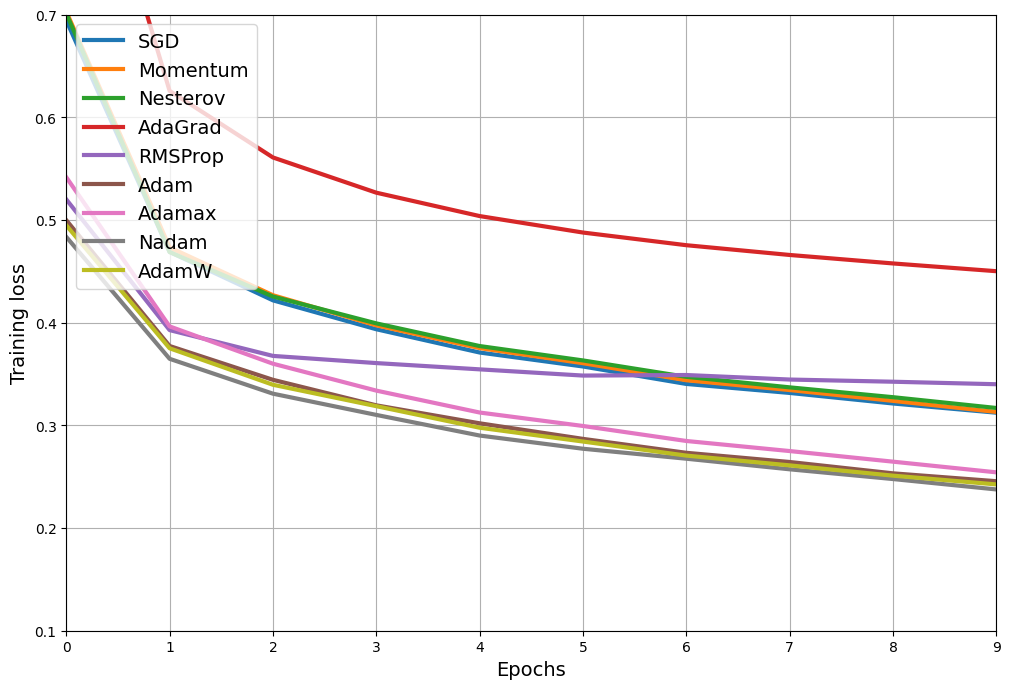

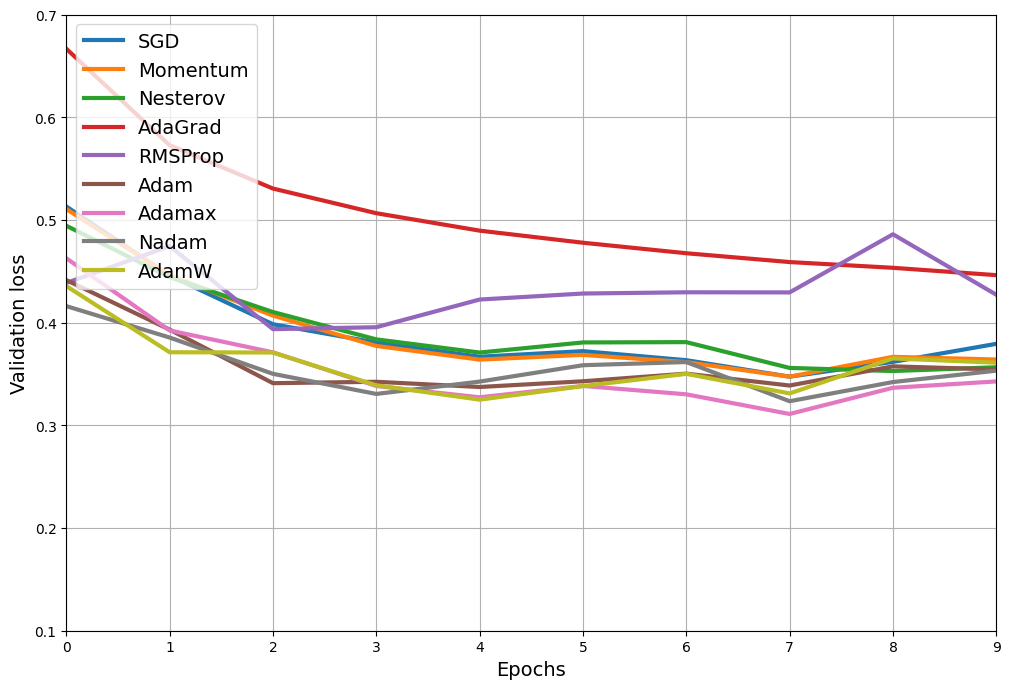

In [62]:
# visualize the learning curves of all the optimizers

for loss in ("loss", "val_loss"):
    plt.figure(figsize=(12, 8))
    opt_names = "SGD Momentum Nesterov AdaGrad RMSProp Adam Adamax Nadam AdamW"
    for history, opt_name in zip((history_sgd, history_momentum, history_nesterov,
                                  history_adagrad, history_rmsprop, history_adam,
                                  history_adamax, history_nadam, history_adamw),
                                 opt_names.split()):
        plt.plot(history.history[loss], label=f"{opt_name}", linewidth=3)

    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel({"loss": "Training loss", "val_loss": "Validation loss"}[loss])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.1, 0.7])
    plt.show()

### Learning Rate Scheduling

**Power Scheduling**
`lr = lr0 / (1 + steps / s)**c`


*   Keras uses `c=1` and `s = 1 / decay`

In [63]:
learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,  # Number of steps after which the learning rate decays
    decay_rate=0.9,     # Decay rate
)
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate_schedule)

In [64]:
history_power_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6732 - accuracy: 0.7673 - val_loss: 0.4784 - val_accuracy: 0.8312
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4599 - accuracy: 0.8375 - val_loss: 0.4657 - val_accuracy: 0.8334
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4143 - accuracy: 0.8512 - val_loss: 0.4117 - val_accuracy: 0.8580
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3910 - accuracy: 0.8612 - val_loss: 0.3867 - val_accuracy: 0.8642
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3723 - accuracy: 0.8671 - val_loss: 0.3727 - val_accuracy: 0.8656
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3570 - accuracy: 0.8726 - val_loss: 0.3785 - val_accuracy: 0.8672
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3460 - accuracy: 0.8747 - val_loss: 0.3608 - val_accurac

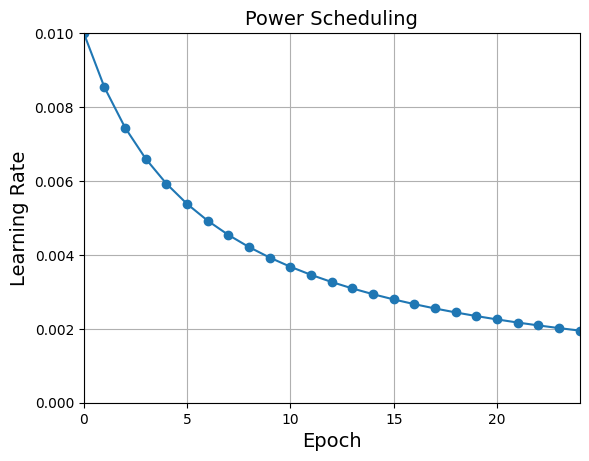

In [65]:
# this cell plots power scheduling

import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
n_epochs = 25

epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

**Exponential Scheduling**

`lr = lr0 * 0.1 ** (epoch / s)`

In [66]:
def exponential_decay_fn(epoch):
  return 0.01 * 0.1 ** (epoch / 20)

In [67]:
def exponential_decay(lr0, s):
  def exponential_decay_fn(epoch):
    return lr0 * 0.1 ** (epoch / s)
  return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [68]:
tf.random.set_seed(42)
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [69]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6774 - accuracy: 0.7668 - val_loss: 0.4893 - val_accuracy: 0.8260 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4598 - accuracy: 0.8381 - val_loss: 0.4459 - val_accuracy: 0.8402 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4148 - accuracy: 0.8538 - val_loss: 0.4145 - val_accuracy: 0.8558 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3912 - accuracy: 0.8612 - val_loss: 0.3847 - val_accuracy: 0.8656 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3728 - accuracy: 0.8679 - val_loss: 0.3793 - val_accuracy: 0.8606 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3589 - accuracy: 0.8728 - val_loss: 0.3845 - val_accuracy: 0.8666 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 7s

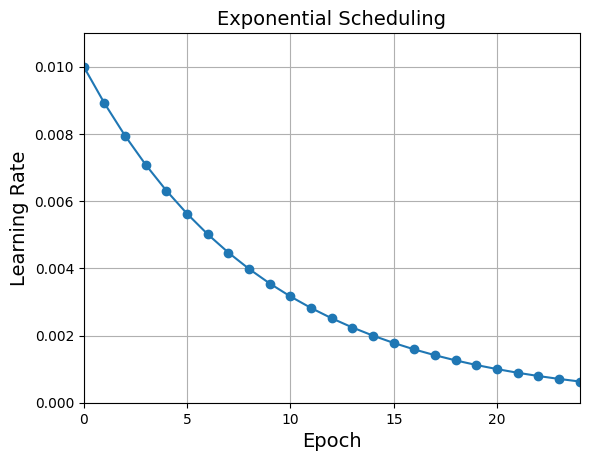

In [70]:
# this cell plots exponential scheduling

plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [71]:
def exponential_decay_fn(epoch, lr):
  return lr * 0.1 ** (1 / 20)

In [72]:
K = tf.keras.backend

class ExponentialDecay(tf.keras.callbacks.Callback):
  def __init__(self, n_steps=40_000):
    super().__init__()
    self.n_steps = n_steps

  def on_batch_begin(self, batch, logs=None):
    # Note - the `batch` argument is reset at each epoch
    lr = K.get_value(self.model.optimizer.learning_rate)
    new_learning_rate = lr * 0.1 ** (1 / self.n_steps)
    K.set_value(self.model.optimizer.learning_rate, new_learning_rate)

  def on_epoch_end(self, epoch, logs=None):
    logs = logs or {}
    logs['lr'] = K.get_value(self.model.optimizer.learning_rate)

In [73]:
lr0 = 0.01
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [74]:
n_epochs = 25
batch_size = 32

n_steps = n_epochs * math.ceil(len(X_train) / batch_size)
exp_decay = ExponentialDecay(n_steps)

history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7014 - accuracy: 0.7594 - val_loss: 0.4896 - val_accuracy: 0.8290 - lr: 0.0091
Epoch 2/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4694 - accuracy: 0.8345 - val_loss: 0.4598 - val_accuracy: 0.8332 - lr: 0.0083
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4231 - accuracy: 0.8502 - val_loss: 0.4135 - val_accuracy: 0.8554 - lr: 0.0076
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3997 - accuracy: 0.8586 - val_loss: 0.3901 - val_accuracy: 0.8606 - lr: 0.0069
Epoch 5/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3811 - accuracy: 0.8647 - val_loss: 0.3872 - val_accuracy: 0.8590 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3667 - accuracy: 0.8698 - val_loss: 0.3878 - val_accuracy: 0.8620 - lr: 0.0058
Epoch 7/25
1719/1719 [==============================] - 8s

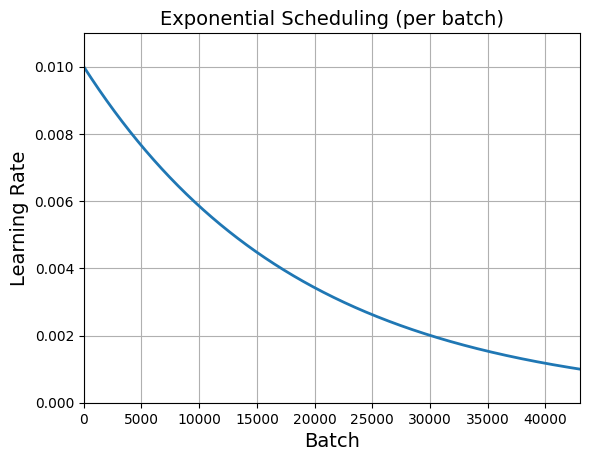

In [75]:
n_steps = n_epochs * math.ceil(len(X_train) / batch_size)
steps = np.arange(n_steps)
decay_rate = 0.1
lrs = lr0 * decay_rate ** (steps / n_steps)

plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

**Piecewise Constant Scheduling**

In [76]:
def piecewise_constant_fn(epoch):
  if epoch < 5:
    return 0.01
  elif epoch < 15:
    return 0.005
  else:
    return 0.001

In [77]:
# this cell demonstrates a more general way to define
# piecewise constant scheduling.

def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[(boundaries > epoch).argmax() - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [78]:
# use a tf.keras.callbacks.LearningRateScheduler like earlier

n_epochs = 25

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = build_model()
optimizer = tf.keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 10s 5ms/step - loss: 0.5470 - accuracy: 0.8058 - val_loss: 0.4451 - val_accuracy: 0.8350 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4495 - accuracy: 0.8428 - val_loss: 0.4954 - val_accuracy: 0.8302 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4336 - accuracy: 0.8463 - val_loss: 0.4625 - val_accuracy: 0.8444 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4185 - accuracy: 0.8527 - val_loss: 0.4809 - val_accuracy: 0.8342 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4147 - accuracy: 0.8532 - val_loss: 0.4259 - val_accuracy: 0.8474 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3602 - accuracy: 0.8683 - val_loss: 0.4018 - val_accuracy: 0.8522 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 8

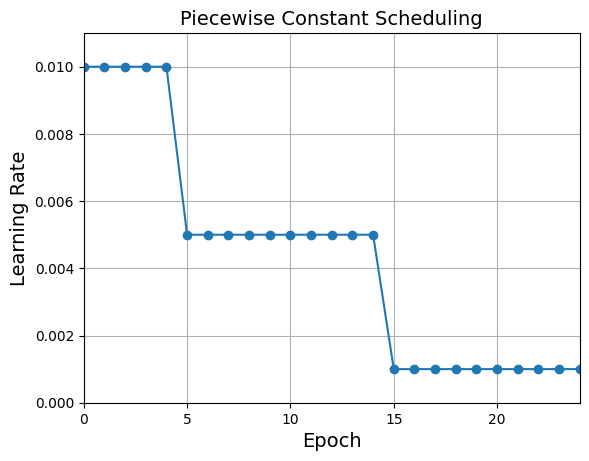

In [79]:
# this cell plots piecewise constant scheduling

plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

**Performance Scheduling**

In [80]:
# build and compile the model

model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [81]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6855 - accuracy: 0.7681 - val_loss: 0.5072 - val_accuracy: 0.8178 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4754 - accuracy: 0.8321 - val_loss: 0.4649 - val_accuracy: 0.8336 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4264 - accuracy: 0.8481 - val_loss: 0.4182 - val_accuracy: 0.8526 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3990 - accuracy: 0.8586 - val_loss: 0.3831 - val_accuracy: 0.8636 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3773 - accuracy: 0.8653 - val_loss: 0.3816 - val_accuracy: 0.8614 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3605 - accuracy: 0.8708 - val_loss: 0.3790 - val_accuracy: 0.8650 - lr: 0.0100
Epoch 7/25
1719/1719 [==============================] - 6s

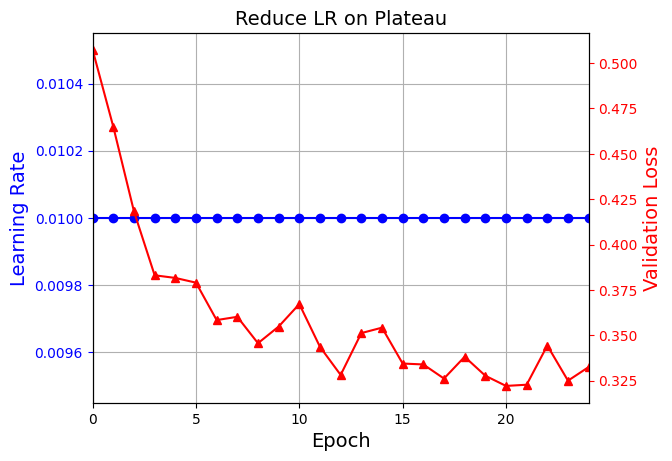

In [82]:
# this cell plots performance scheduling

plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

**tf.keras schedulers**

In [83]:
import math

batch_size = 32
n_epochs = 25
n_steps = n_epochs * math.ceil(len(X_train) / batch_size)
scheduled_learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01, decay_steps=n_steps, decay_rate=0.1)
optimizer = tf.keras.optimizers.SGD(learning_rate=scheduled_learning_rate)

In [84]:
# extra code - build and train the model
model = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6993 - accuracy: 0.7617 - val_loss: 0.5022 - val_accuracy: 0.8272
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4757 - accuracy: 0.8330 - val_loss: 0.4631 - val_accuracy: 0.8352
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4274 - accuracy: 0.8479 - val_loss: 0.4232 - val_accuracy: 0.8532
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4021 - accuracy: 0.8579 - val_loss: 0.3960 - val_accuracy: 0.8608
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3833 - accuracy: 0.8646 - val_loss: 0.3871 - val_accuracy: 0.8616
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3678 - accuracy: 0.8694 - val_loss: 0.3918 - val_accuracy: 0.8628
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3576 - accuracy: 0.8719 - val_loss: 0.3760 - val_accuracy:

In [85]:
# shows how to use PiecewiseConstantDecay
scheduled_learning_rate = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

### Avoiding Overfitting Through Regularization

**l1 and l2 regularization**

In [86]:
layer = tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal",
                              kernel_regularizer=tf.keras.regularizers.l2(0.01))

In [87]:
tf.random.set_seed(42)

In [88]:
from functools import partial

RegularizedDense = partial(tf.keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=tf.keras.regularizers.l2(0.01))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(100),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax"),
])

In [89]:
# compile and train the model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 [==============================] - 7s 4ms/step - loss: 3.1186 - accuracy: 0.7764 - val_loss: 1.8578 - val_accuracy: 0.8240
Epoch 2/2
1719/1719 [==============================] - 6s 3ms/step - loss: 1.4255 - accuracy: 0.8137 - val_loss: 1.1273 - val_accuracy: 0.8190


### Dropout

In [90]:
tf.random.set_seed(42)

In [91]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [92]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
model.fit(X_train, y_train, epochs=10,
          validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 4ms/step - loss: 0.6757 - accuracy: 0.7544 - val_loss: 0.4367 - val_accuracy: 0.8368
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5089 - accuracy: 0.8148 - val_loss: 0.4209 - val_accuracy: 0.8360
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4718 - accuracy: 0.8274 - val_loss: 0.3981 - val_accuracy: 0.8518
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4481 - accuracy: 0.8365 - val_loss: 0.3761 - val_accuracy: 0.8570
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4320 - accuracy: 0.8395 - val_loss: 0.3701 - val_accuracy: 0.8622
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4239 - accuracy: 0.8437 - val_loss: 0.3611 - val_accuracy: 0.8646
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4158 - accuracy: 0.8481 - val_loss: 0.3628 - val_accuracy

In [93]:
model.evaluate(X_train, y_train)

1719/1719 [==============================] - 4s 2ms/step - loss: 0.3113 - accuracy: 0.8839


[0.31130555272102356, 0.8839272856712341]

In [94]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3719 - accuracy: 0.8642


[0.3718882203102112, 0.8641999959945679]

### MC Dropout

In [95]:
tf.random.set_seed(42)

In [96]:
y_probas = np.stack([model(X_test, training=True)
                    for sample in range(100)])
y_proba = y_probas.mean(axis=0)

In [97]:
model.predict(X_test[:1]).round(3)

1/1 [==============================] - 0s 79ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.02 , 0.   , 0.166, 0.   ,
        0.814]], dtype=float32)

In [98]:
y_proba[0].round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.064, 0.   , 0.195, 0.   ,
       0.74 ], dtype=float32)

In [99]:
y_std = y_probas.std(axis=0)
y_std[0].round(3)

array([0.   , 0.   , 0.001, 0.001, 0.001, 0.087, 0.001, 0.166, 0.002,
       0.182], dtype=float32)

In [100]:
y_pred = y_proba.argmax(axis=1)
accuracy = (y_pred == y_test).sum() / len(y_test)
accuracy

0.8659

In [101]:
class MCDropout(tf.keras.layers.Dropout):
  def call(self, inputs, training=None):
    return super().call(inputs, training=True)

In [102]:
# extra code - shows how to convert Dropout to MCDropout in a Sequential model
Dropout = tf.keras.layers.Dropout
mc_model = tf.keras.Sequential([
    MCDropout(layer.rate) if isinstance(layer, Dropout) else layer
    for layer in model.layers
])
mc_model.set_weights(model.get_weights())

In [103]:
mc_model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 mc_dropout (MCDropout)      (None, 784)               0         
                                                                 
 dense_77 (Dense)            (None, 100)               78500     
                                                                 
 mc_dropout_1 (MCDropout)    (None, 100)               0         
                                                                 
 dense_78 (Dense)            (None, 100)               10100     
                                                                 
 mc_dropout_2 (MCDropout)    (None, 100)               0         
                                                                 
 dense_79 (Dense)            (None, 10)              

In [104]:
tf.random.set_seed(42)
np.mean([mc_model.predict(X_test[:1])
        for sample in range(100)], axis=0).round(2)

1/1 [==============================] - 0s 31ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.21, 0.  , 0.7 ]],
      dtype=float32)

### Max norm

In [105]:
dense = tf.keras.layers.Dense(
    100, activation="relu", kernel_initializer="he_normal",
    kernel_constraint=tf.keras.constraints.max_norm(1.)
)

In [106]:
# shows how to apply max norm to every hidden layer in a model

MaxNormDense = partial(tf.keras.layers.Dense,
                       activation="relu", kernel_initializer="he_normal",
                       kernel_constraint=tf.keras.constraints.max_norm(1.))

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(100),
    MaxNormDense(100),
    tf.keras.layers.Dense(10, activation="softmax")
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 4ms/step - loss: 0.5493 - accuracy: 0.8015 - val_loss: 0.4397 - val_accuracy: 0.8316
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4103 - accuracy: 0.8497 - val_loss: 0.4070 - val_accuracy: 0.8464
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3789 - accuracy: 0.8595 - val_loss: 0.3677 - val_accuracy: 0.8646
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3597 - accuracy: 0.8682 - val_loss: 0.3608 - val_accuracy: 0.8680
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3464 - accuracy: 0.8713 - val_loss: 0.3596 - val_accuracy: 0.8652
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3391 - accuracy: 0.8739 - val_loss: 0.3614 - val_accuracy: 0.8686
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3286 - accuracy: 0.8771 - val_loss: 0.3825 - val_accuracy: